# **Proyek Analisis Data: [Bike Sharing Dataset]**
- **Nama**       : Muhammad Fharahbi Fachri
- **Email**       : mc179d5y0226@student.devacademy.id
- **ID Dicoding** : MC179D5Y0226

## Menentukan Pertanyaan Bisnis
- Berapa banyak peminjam yang teregistrasi dan casual?
- Bagaimana pola pengguaan sepeda dalam penggunaan perjam dan perhari?
- Seperti apa pengaruh cuaca dalam peminjaman sepeda perhari?
- Seperti apa pengaruh musim dan hubungannya dengan cuaca dalam peminjaman sepeda perhari?

## Import Semua Packages/Library yang Digunakan

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Wragling


### Gathering Data

In [91]:
df_hari = pd.read_csv("day.csv")
df_hari

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [92]:
df_jam= pd.read_csv("hour.csv")
df_jam

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Terdapat 2 buah tabel dimana terdapat tabel peminjam sepeda berdasarkan jam dan juga hari
- Kemudian terdapat bagian penting dari readme yaitu:
+ cuaca :
		- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
		- 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
		- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
		- 4: Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut

### Assessing Data

In [93]:
df_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [94]:
df_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [95]:
df_hari.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [96]:
df_jam.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [97]:
df_hari.duplicated().sum()

0

In [98]:
df_jam.duplicated().sum()


0

In [99]:
df_jam.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [100]:
df_hari.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dari hasil assesing data yang didapatkan adalah,tidak terdapat nilai yang kosong.
- Selanjutnya juga tidak terdapat data yang terduplikat.

### Cleaning Data

In [101]:
df_hari.temp.value_counts()

,count
temp,
0.635000,5
0.265833,5
0.680000,4
0.710833,4
0.564167,4
...,...
0.669167,1
0.643333,1
0.707059,1


In [102]:
df_jam.temp.value_counts()

,count
temp,
0.62,726
0.66,693
0.64,692
0.70,690
0.60,675
0.36,671
0.34,645
0.30,641
0.40,614


**Insight:**
- Karena tidak terdapat data yang kosong maka cleaning data tidak diperlukan lagi.


## Exploratory Data Analysis (EDA)

### Explore...

#### Pertanyaan Pertama

In [103]:
df_jam[['casual','registered']].describe()

,casual,registered
count,17379.000000,17379.000000
mean,35.676218,153.786869
std,49.305030,151.357286
min,0.000000,0.000000
25%,4.000000,34.000000
50%,17.000000,115.000000
75%,48.000000,220.000000
max,367.000000,886.000000


In [104]:
df_hari[['casual','registered']].describe()

,casual,registered
count,731.000000,731.000000
mean,848.176471,3656.172367
std,686.622488,1560.256377
min,2.000000,20.000000
25%,315.500000,2497.000000
50%,713.000000,3662.000000
75%,1096.000000,4776.500000
max,3410.000000,6946.000000


**Insight:**
- Berdasarkan pertanyaan pertama dapat kita lihat perbandingan nilai maksimul dan mean dari casual dan regsitered.
- Maka dari itu jawaban nya adalah pengguna terbanyak adalah mereka yang registered.

#### Pertanyaan kedua

In [105]:
df_hari[['holiday','weekday','workingday']].value_counts()

holiday  weekday  workingday
0        0        0             105
         6        0             105
         2        1             103
         3        1             103
         4        1             102
         5        1             102
         1        1              90
1        1        0              15
         4        0               2
         5        0               2
         2        0               1
         3        0               1
Name: count, dtype: int64

In [106]:
df_jam[['holiday','weekday','workingday']].value_counts()

holiday  weekday  workingday
0        6        0             2512
         0        0             2502
         3        1             2451
         5        1             2439
         2        1             2430
         4        1             2423
         1        1             2122
1        1        0              357
         4        0               48
         5        0               48
         3        0               24
         2        0               23
Name: count, dtype: int64

**Insight:**
- Berdasarkan hasil analisis diatas,pola pengguna sepeda perjam dan perhari terbanyak digunakan ketika hari libur atau akhir pekan.


#### Pertanyaan Ketiga

In [107]:
weather = {
    1: "Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian",
    2: "Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut",
    3: "Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan",
    4: "Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut",
}
# Menambahkan kolom deskripsi cuaca ke dalam dataset
df_hari['cuaca'] = df_hari['weathersit'].map(weather)


# Menampilkan hasilnya
df_hari[['weathersit', 'cuaca']]

,weathersit,cuaca
0,2,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S..."
1,2,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S..."
2,1,"Cerah, Sedikit awan, Berawan sebagian, Berawan..."
3,1,"Cerah, Sedikit awan, Berawan sebagian, Berawan..."
4,1,"Cerah, Sedikit awan, Berawan sebagian, Berawan..."
...,...,...
726,2,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S..."
727,2,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S..."
728,2,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S..."
729,1,"Cerah, Sedikit awan, Berawan sebagian, Berawan..."


In [108]:
df_hari.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cuaca
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S..."
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S..."
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,"Cerah, Sedikit awan, Berawan sebagian, Berawan..."
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,"Cerah, Sedikit awan, Berawan sebagian, Berawan..."
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,"Cerah, Sedikit awan, Berawan sebagian, Berawan..."


In [109]:
df_hari.groupby('cuaca').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['sum','mean']
})

casual registered  \
                                                       sum        sum   
cuaca                                                                   
Cerah, Sedikit awan, Berawan sebagian, Berawan ...  446346    1811606   
Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...  169776     827082   
Salju Ringan, Hujan Ringan + Badai Petir + Awan...    3895      33974   

                                                        cnt               
                                                        sum         mean  
cuaca                                                                     
Cerah, Sedikit awan, Berawan sebagian, Berawan ...  2257952  4876.786177  
Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...   996858  4035.862348  
Salju Ringan, Hujan Ringan + Badai Petir + Awan...    37869  1803.285714

**Insight:**
- Exploratory untuk pertanyaan ketiga tentang pengaruh cuaca adalah dengan cara mengubah data angka cuaca menjadi deskripsi,sesuai dari readme data ini.
- Setelah itu kita membuat seperti tabel guna mengambil data cuaca,jumlah peminjam dan rata-rata peminjam.
- Didapatkan jawaban bahwa pengaruh cuaca terhadap pengguna sepeda berkaitan,dengan ini peminjam terbanyak terjadi saat cuaca cerah,sedikit berawan,kemudian di ikuti dengan cuaca kabut+berawan,dan terakhir jumlah pengguna sepeda paling sedikit adalah saat salju ringan,hujan ringan.

#### Pertanyaan keempat

In [110]:
season_grup = {
    1: "Musim Semi",
    2: "Musim Panas",
    3: "Musim gugur",
    4: "Musim dingin",
}
# Menambahkan kolom deskripsi cuaca ke dalam dataset
df_hari['Musim'] = df_hari['season'].map(season_grup)
df_jam['Musim'] = df_jam['season'].map(season_grup)

# Menampilkan hasilnya
df_hari[['season', 'Musim']]

,season,Musim
0,1,Musim Semi
1,1,Musim Semi
2,1,Musim Semi
3,1,Musim Semi
4,1,Musim Semi
...,...,...
726,1,Musim Semi
727,1,Musim Semi
728,1,Musim Semi
729,1,Musim Semi


In [111]:
df_hari.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cuaca,Musim
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",Musim Semi
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",Musim Semi
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,"Cerah, Sedikit awan, Berawan sebagian, Berawan...",Musim Semi
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,"Cerah, Sedikit awan, Berawan sebagian, Berawan...",Musim Semi
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,"Cerah, Sedikit awan, Berawan sebagian, Berawan...",Musim Semi


In [112]:
df_hari.groupby('Musim').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['sum','mean']
})

casual registered      cnt             
                 sum        sum      sum         mean
Musim                                                
Musim Panas   203522     715067   918589  4992.331522
Musim Semi     60622     410726   471348  2604.132597
Musim dingin  129782     711831   841613  4728.162921
Musim gugur   226091     835038  1061129  5644.303191

In [113]:
df_hari.groupby(by=["Musim", "cuaca"]).agg({
     'casual': 'sum',
    'registered': 'sum',
    'cnt': ['sum','mean']
})

casual  \
                                                                    sum   
Musim        cuaca                                                        
Musim Panas  Cerah, Sedikit awan, Berawan sebagian, Berawan ...  146388   
             Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...   56714   
             Salju Ringan, Hujan Ringan + Badai Petir + Awan...     420   
Musim Semi   Cerah, Sedikit awan, Berawan sebagian, Berawan ...   41562   
             Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...   18779   
             Salju Ringan, Hujan Ringan + Badai Petir + Awan...     281   
Musim dingin Cerah, Sedikit awan, Berawan sebagian, Berawan ...   90451   
             Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...   37876   
             Salju Ringan, Hujan Ringan + Badai Petir + Awan...    1455   
Musim gugur  Cerah, Sedikit awan, Berawan sebagian, Berawan ...  167945   
             Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...   56407   
             Salju Ringan, Hujan Ringan + Badai Petir + Awan...    1739   

                                                                registered  \
                                                                       sum   
Musim        cuaca                                                           
Musim Panas  Cerah, Sedikit awan, Berawan sebagian, Berawan ...     480598   
             Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...     231382   
             Salju Ringan, Hujan Ringan + Badai Petir + Awan...       3087   
Musim Semi   Cerah, Sedikit awan, Berawan sebagian, Berawan ...     270474   
             Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...     136794   
             Salju Ringan, Hujan Ringan + Badai Petir + Awan...       3458   
Musim dingin Cerah, Sedikit awan, Berawan sebagian, Berawan ...     429036   
             Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...     264634   
             Salju Ringan, Hujan Ringan + Badai Petir + Awan...      18161   
Musim gugur  Cerah, Sedikit awan, Berawan sebagian, Berawan ...     631498   
             Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...     194272   
             Salju Ringan, Hujan Ringan + Badai Petir + Awan...       9268   

                                                                    cnt  \
                                                                    sum   
Musim        cuaca                                                        
Musim Panas  Cerah, Sedikit awan, Berawan sebagian, Berawan ...  626986   
             Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...  288096   
             Salju Ringan, Hujan Ringan + Badai Petir + Awan...    3507   
Musim Semi   Cerah, Sedikit awan, Berawan sebagian, Berawan ...  312036   
             Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...  155573   
             Salju Ringan, Hujan Ringan + Badai Petir + Awan...    3739   
Musim dingin Cerah, Sedikit awan, Berawan sebagian, Berawan ...  519487   
             Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...  302510   
             Salju Ringan, Hujan Ringan + Badai Petir + Awan...   19616   
Musim gugur  Cerah, Sedikit awan, Berawan sebagian, Berawan ...  799443   
             Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...  250679   
             Salju Ringan, Hujan Ringan + Badai Petir + Awan...   11007   

                                                                              
                                                                        mean  
Musim        cuaca                                                            
Musim Panas  Cerah, Sedikit awan, Berawan sebagian, Berawan ...  5548.548673  
             Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...  4236.705882  
             Salju Ringan, Hujan Ringan + Badai Petir + Awan...  1169.000000  
Musim Semi   Cerah, Sedikit awan, Berawan sebagian, Berawan ...  2811.135135  
             Kabut + Berawan, Kabut + Awan pecah, Kabut + Se...  2357.166667  
          

**Insgiht:**
- Untuk mengetahui maksud dari musim apa saja yang terjadi,kita dapat lihat di readme dan di dapatkan seperti berikut:
 + season:
 season (1:springer, 2:summer, 3:fall, 4:winter).
- Kemudian melakukan grupby untuk melihat pengaruh musim dengan cara melihat total dan rata-rata pengguna.
- Selanjutnya kembali melakukan grupby untuk melihat pengaruh dan hubungan antara musim dan cuaca dengan melihat jumlah dan rata-ratanya juga.
- Berdasarkan hasil analisis yang di lakukan untuk pertanyaan ke empat, kita mendapatkan jawaban dari pertanyaan seperti berikut:
 + Musim juga berpengaruh untuk pemakaian sepeda,dapat dilihat dari hasil analisis bahwa,pemakai sepeda tertinggi terjadi saat musim gugur.
 + Selanjutnya pengaruh musim dan hubungan cuaca juga dapat disimpulkan dengan,jumlah pemakai sepeda terbanyak terjadi pada saat musim gugur dan dengan keadaan cuaca yang cerah

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak peminjam yang teregistrasi dan casual?

<ipython-input-114-1daeccab6f32>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pengguna_jumlah.index,y=pengguna_jumlah, palette='viridis',ax=axes[0])
<ipython-input-114-1daeccab6f32>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pengguna_rerata.index,y=pengguna_rerata, palette='viridis',ax=axes[1])


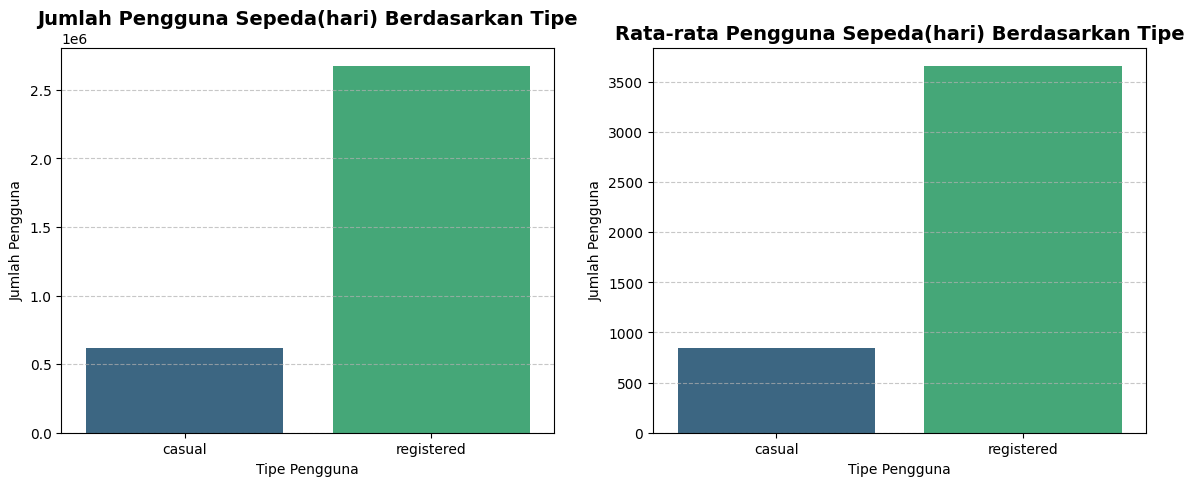

In [114]:
pengguna_jumlah=df_hari[['casual','registered']].sum()
pengguna_rerata=df_hari[['casual','registered']].mean()

fig,axes = plt.subplots(1,2,figsize=(14,5))


sns.barplot(x=pengguna_jumlah.index,y=pengguna_jumlah, palette='viridis',ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda(hari) Berdasarkan Tipe', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tipe Pengguna')
axes[0].set_ylabel('Jumlah Pengguna')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(x=pengguna_rerata.index,y=pengguna_rerata, palette='viridis',ax=axes[1])
axes[1].set_title('Rata-rata Pengguna Sepeda(hari) Berdasarkan Tipe', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tipe Pengguna')
axes[1].set_ylabel('Jumlah Pengguna')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



<ipython-input-115-0867ac773e09>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pengguna_jumlah.index,y=pengguna_jumlah, palette='viridis',ax=axes[0])
<ipython-input-115-0867ac773e09>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pengguna_rerata.index,y=pengguna_rerata, palette='viridis',ax=axes[1])


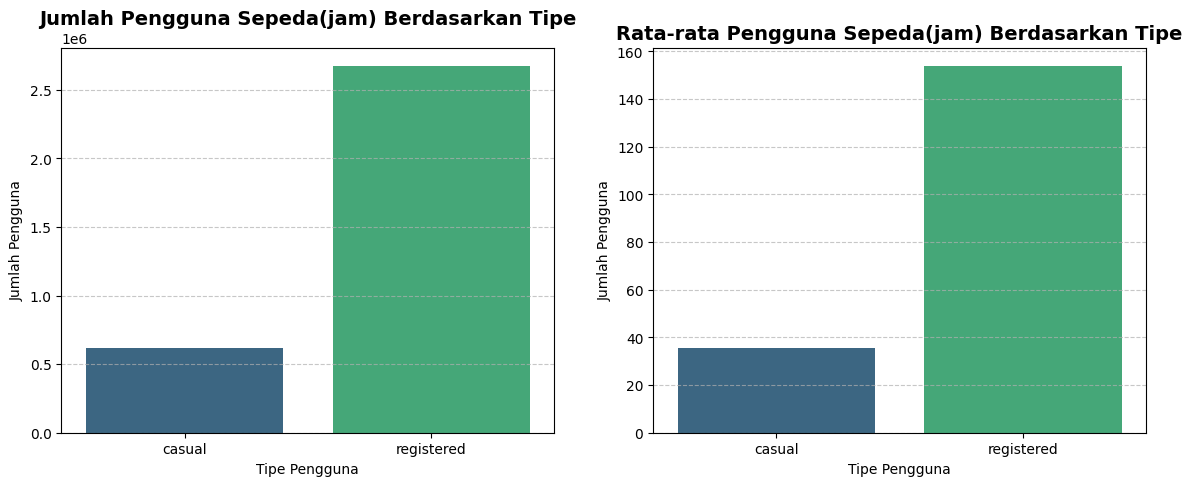

In [115]:
pengguna_jumlah=df_jam[['casual','registered']].sum()
pengguna_rerata=df_jam[['casual','registered']].mean()

fig,axes = plt.subplots(1,2,figsize=(14,5))


sns.barplot(x=pengguna_jumlah.index,y=pengguna_jumlah, palette='viridis',ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda(jam) Berdasarkan Tipe', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tipe Pengguna')
axes[0].set_ylabel('Jumlah Pengguna')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(x=pengguna_rerata.index,y=pengguna_rerata, palette='viridis',ax=axes[1])
axes[1].set_title('Rata-rata Pengguna Sepeda(jam) Berdasarkan Tipe', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tipe Pengguna')
axes[1].set_ylabel('Jumlah Pengguna')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Insight:**
- Berdasarkan visualisasi diatas, jawaban untuk pertanyaan pertama adalah pengguna sepeda perhari dan perjam terbanyak adalah mereka yang registered.



### Pertanyaan 2: Bagaimana pola pengguaan sepeda dalam penggunaan perjam dan perhari?

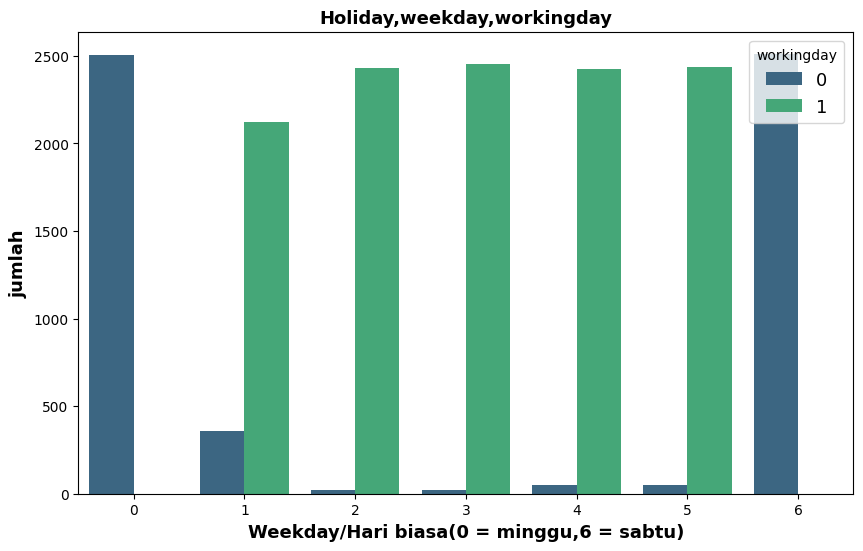

In [116]:

pengguna_jumlah=df_jam[['holiday','weekday','workingday',]].value_counts().reset_index()
pengguna_jumlah.columns=['holiday','weekday','workingday','count']
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='count', hue='workingday', data=pengguna_jumlah, palette='viridis')

plt.title("Holiday,weekday,workingday",fontsize=13,fontweight="bold")
plt.xlabel("Weekday/Hari biasa(0 = minggu,6 = sabtu)",fontsize=13,fontweight="bold")
plt.ylabel("jumlah",fontsize=13,fontweight="bold")
plt.legend(title="workingday",fontsize=13)
plt.show()


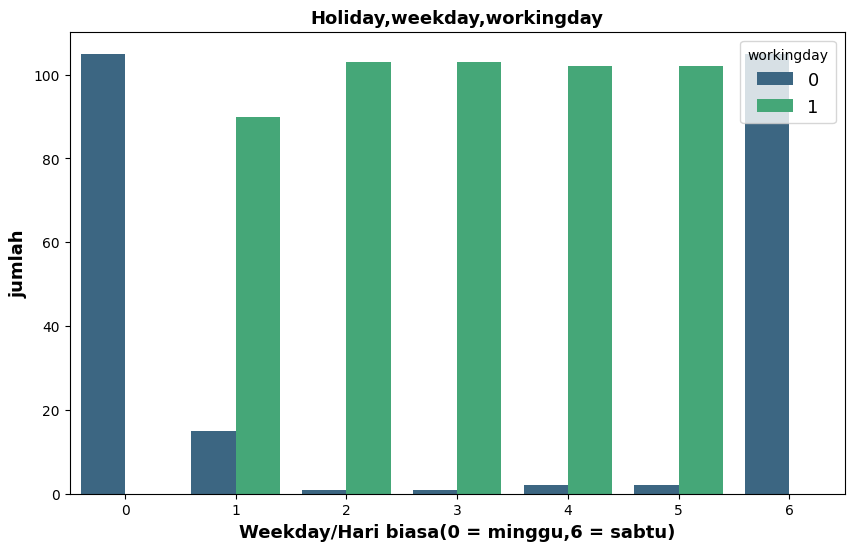

In [117]:
pengguna_jumlah=df_hari[['holiday','weekday','workingday',]].value_counts().reset_index()
pengguna_jumlah.columns=['holiday','weekday','workingday','count']
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='count', hue='workingday', data=pengguna_jumlah, palette='viridis')

plt.title("Holiday,weekday,workingday",fontsize=13,fontweight="bold")
plt.xlabel("Weekday/Hari biasa(0 = minggu,6 = sabtu)",fontsize=13,fontweight="bold")
plt.ylabel("jumlah",fontsize=13,fontweight="bold")
plt.legend(title="workingday",fontsize=13)
plt.show()

**Insight:**
- Berdasarkan visualisasi diatas:
 + weekday= 0-6 yang mendefinisikan hari biasa dalam seminggu,dimuai 0 adalah minggu dan 6 mendefinisikan sabtu.
 + Working day = 0 dan 1 dimana:
  ++ 1 = Jika hari bukan akhir pekan atau hari libur.
  ++ 0 = Akhir pekan dan libur.
 + Pola pengguna sepeda pada perjam dan perhari mendapat lonjakan pada hari minggu dan sabtu(akhir pekan).

### Pertanyaan 3: Seperti apa pengaruh cuaca dalam peminjaman sepeda perhari?

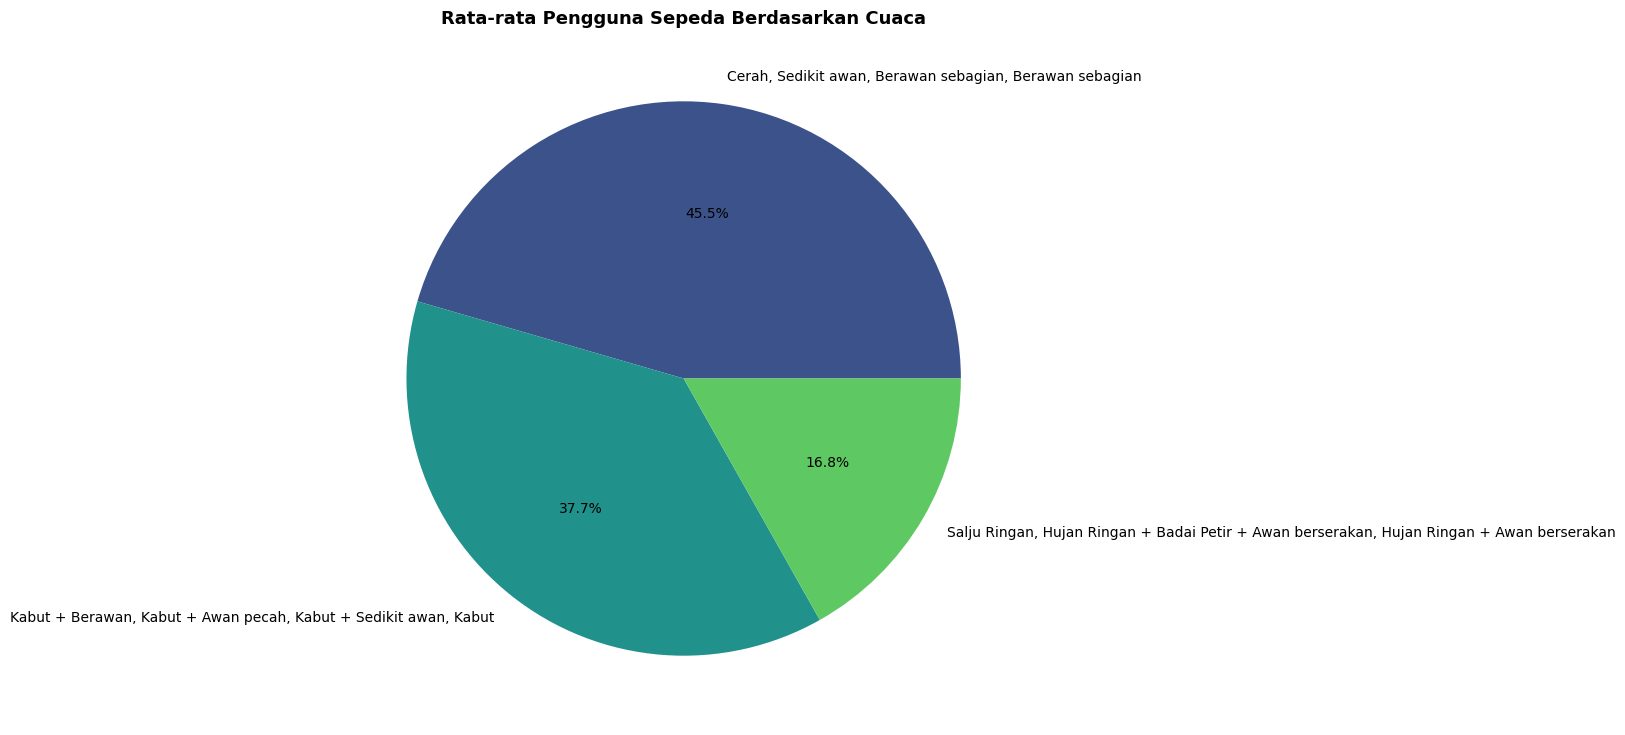

In [118]:
df_Cuace = df_hari.groupby('cuaca').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['sum','mean']
}).reset_index()
df_Cuace.columns = ['cuaca', 'casual', 'registered', 'cnt_sum', 'cnt_mean']
plt.figure(figsize=(9, 9))
plt.pie(df_Cuace['cnt_mean'], labels=df_Cuace['cuaca'], autopct='%1.1f%%', colors=sns.color_palette("viridis",len(df_Cuace)))
plt.title("Rata-rata Pengguna Sepeda Berdasarkan Cuaca",fontsize=13,fontweight="bold")
plt.show()

**Insight:**
- Berdasarkan hasil diatas,cuaca juga mempengaruhi pengguna sepeda untuk melakukan kegiatan,pada saat cuaca cerah,sedikit berawan, dan berawan sebagian mempunyai presentase tertinggi dengan nilai 45.5%


### Pertanyaan 4: Seperti apa pengaruh musim dan hubungannya dengan cuaca dalam peminjaman sepeda perhari?

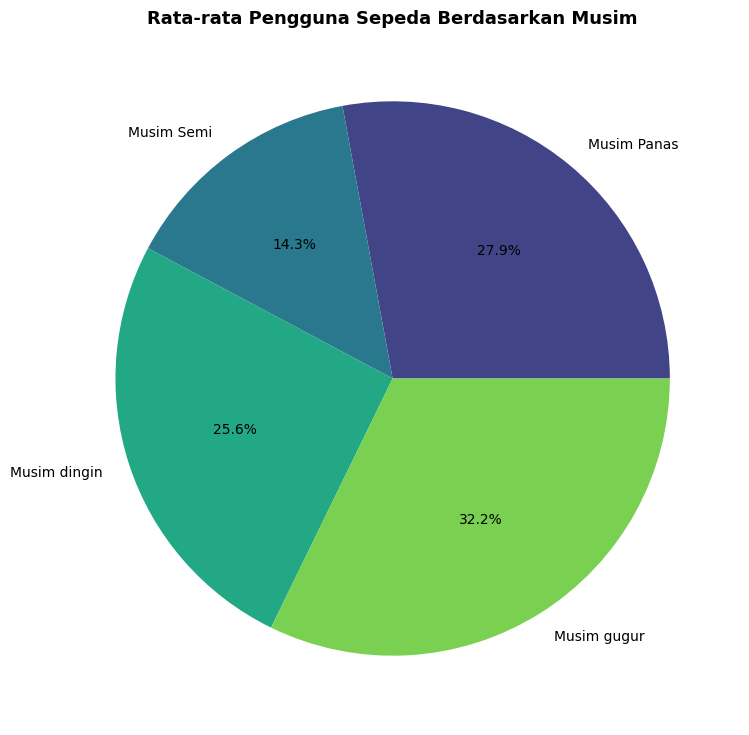

In [119]:
df_musim = df_hari.groupby('Musim').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['sum','mean']
}).reset_index()
df_musim.columns = ['Musim', 'casual', 'registered', 'cnt_sum', 'cnt_mean']
plt.figure(figsize=(9, 9))
plt.pie(df_musim['cnt_sum'], labels=df_musim['Musim'], autopct='%1.1f%%', colors=sns.color_palette("viridis",len(df_musim)))
plt.title("Rata-rata Pengguna Sepeda Berdasarkan Musim",fontsize=13,fontweight="bold")
plt.show()

**Insight:**
- Berdasarkan hasil visualsasi,musim juga mempengaruhi sesorang untuk menggunakan sepeda,kondisi pengguna sepeda terbanyak terjadi ketika musim gugur, dan musim panas.

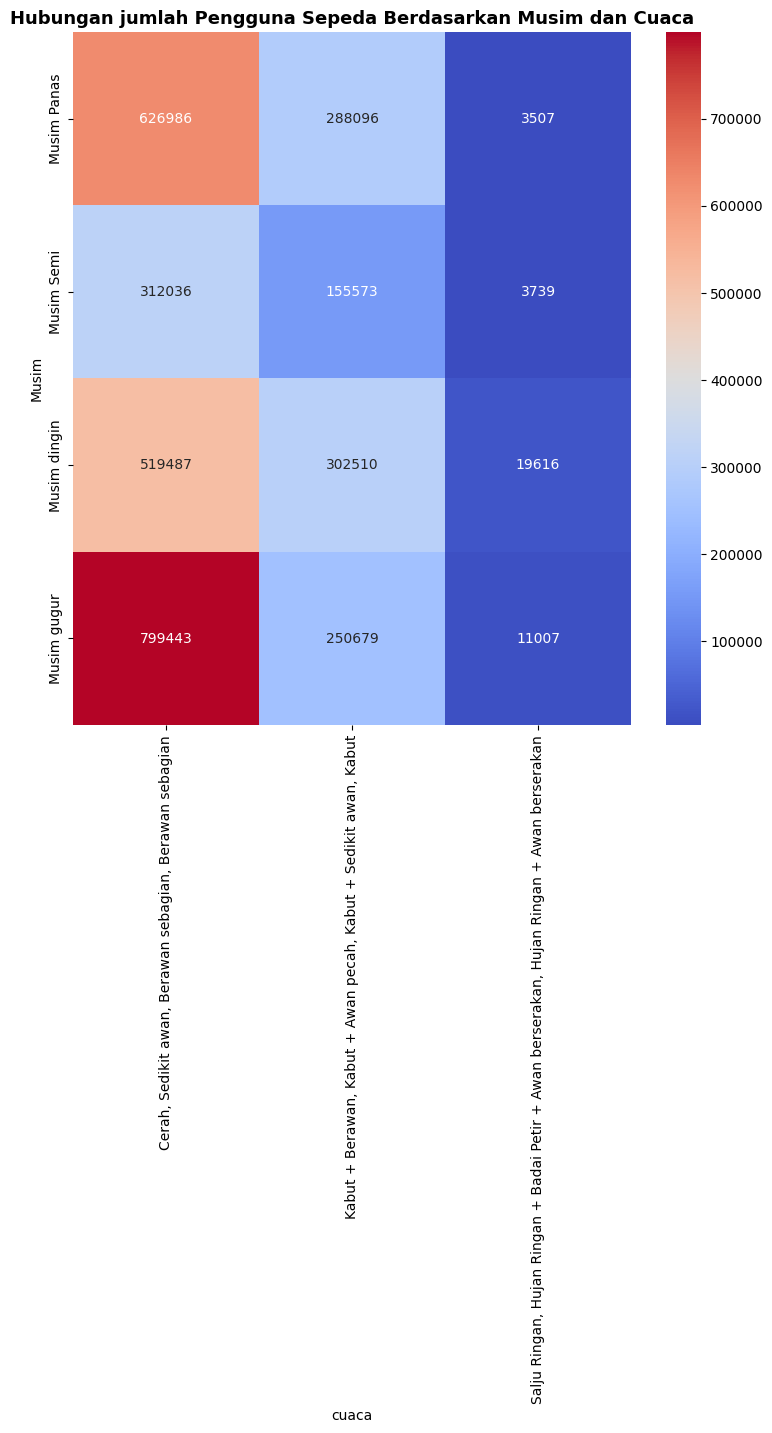

In [120]:
df_pengaruh=df_hari.groupby(by=["Musim", "cuaca"]).agg({
     'casual': 'sum',
    'registered': 'sum',
    'cnt': ['sum','mean']
}).reset_index()
df_pengaruh.columns = ['Musim', 'cuaca', 'casual', 'registered', 'cnt_sum', 'cnt_mean']
df_pivot = df_pengaruh.pivot(index='Musim', columns='cuaca', values='cnt_sum')
plt.figure(figsize=(9, 9))
sns.heatmap(df_pivot, annot=True, cmap='coolwarm', fmt='.0f')
plt.title("Hubungan jumlah Pengguna Sepeda Berdasarkan Musim dan Cuaca",fontsize=13,fontweight="bold")
plt.show()

**Insight:**
- Peta heatmap menunjukkan bahwa warna yang semakin merah merupakan banyak pengguna sepeda,sedangkan semakin biru semakin sedikit.
- Kemudian dari pengaruh hubungan musim dan cuaca didapatkan bahwa pengguna sepeda terbnayak di musim gugur dengan kondisi cuaca cerah,sedikit berawan di ikuti denga musim panas dan juga cuaca cerah,sedikit berawan,dan kondisi pengguna sepeda yang paling sedikit terjadi ketika musim panas,dengan cuaca salju ringan,hujan ringan.

## Analisis Lanjutan(Opsional)

Disini saya menggunakan analisis lanjutan menggunakan Clustering,guna untuk mengelompokkan banyaknya pengguna sepeda berdasarkan musim,suhu luar,dan mengetahui banyaknya jumlah peminjam/pengguna sepeda.

### Manual Grupping

In [139]:
kelompok_Musim={
    1: "Sangat sedikit pengguna",
    2: "banyak pengguna",
    3: "sangat banyak pengguna",
    4: "sedikit pengguna",
}
df_hari["Kategori"]= df_hari["season"].map(kelompok_Musim)
df_hari

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cuaca,Musim,Kategori
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",Musim Semi,Sangat sedikit pengguna
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",Musim Semi,Sangat sedikit pengguna
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,"Cerah, Sedikit awan, Berawan sebagian, Berawan...",Musim Semi,Sangat sedikit pengguna
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,"Cerah, Sedikit awan, Berawan sebagian, Berawan...",Musim Semi,Sangat sedikit pengguna
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,"Cerah, Sedikit awan, Berawan sebagian, Berawan...",Musim Semi,Sangat sedikit pengguna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",Musim Semi,Sangat sedikit pengguna
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",Musim Semi,Sangat sedikit pengguna
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",Musim Semi,Sangat sedikit pengguna
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,"Cerah, Sedikit awan, Berawan sebagian, Berawan...",Musim Semi,Sangat sedikit pengguna


**Insight:**
- Disini dilakukan clustering atau pengelompokan berdasarkan analisis sebelumnya dengan cara membuat nama kategori,yang bermaksud untuk menandakan/mengelompokkan pengguna sepeda terbanyak berdasarkan musim.

### Bining

In [141]:
jumlah_bins = [0, 2000, 4000, df_hari["cnt"].max()]
jumlah_labels = ["Rendah","Menengah","Tinggi"]
df_hari["jumlah_kategori"] = pd.cut(df_hari["cnt"], bins=jumlah_bins, labels=jumlah_labels)


In [142]:
suhu_bins=[0, 0.3, 0.6, df_hari["temp"].max()]
suhu_labels = ["Dingin","Sedang","Panas"]
df_hari["suhu_kategori"] = pd.cut(df_hari["temp"], bins=suhu_bins, labels=suhu_labels)


In [151]:
df_hari

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,cuaca,Musim,Kategori,jumlah_kategori,suhu_kategori
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",Musim Semi,Sangat sedikit pengguna,Rendah,Sedang
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",Musim Semi,Sangat sedikit pengguna,Rendah,Sedang
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,"Cerah, Sedikit awan, Berawan sebagian, Berawan...",Musim Semi,Sangat sedikit pengguna,Rendah,Dingin
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,"Cerah, Sedikit awan, Berawan sebagian, Berawan...",Musim Semi,Sangat sedikit pengguna,Rendah,Dingin
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,"Cerah, Sedikit awan, Berawan sebagian, Berawan...",Musim Semi,Sangat sedikit pengguna,Rendah,Dingin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,...,0.652917,0.350133,247,1867,2114,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",Musim Semi,Sangat sedikit pengguna,Menengah,Dingin
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,...,0.590000,0.155471,644,2451,3095,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",Musim Semi,Sangat sedikit pengguna,Menengah,Dingin
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,...,0.752917,0.124383,159,1182,1341,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",Musim Semi,Sangat sedikit pengguna,Rendah,Dingin
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,...,0.483333,0.350754,364,1432,1796,"Cerah, Sedikit awan, Berawan sebagian, Berawan...",Musim Semi,Sangat sedikit pengguna,Rendah,Dingin


<ipython-input-149-29150a239def>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_hari["jumlah_kategori"], palette="coolwarm")


Text(0, 0.5, 'Jumlah Hari')

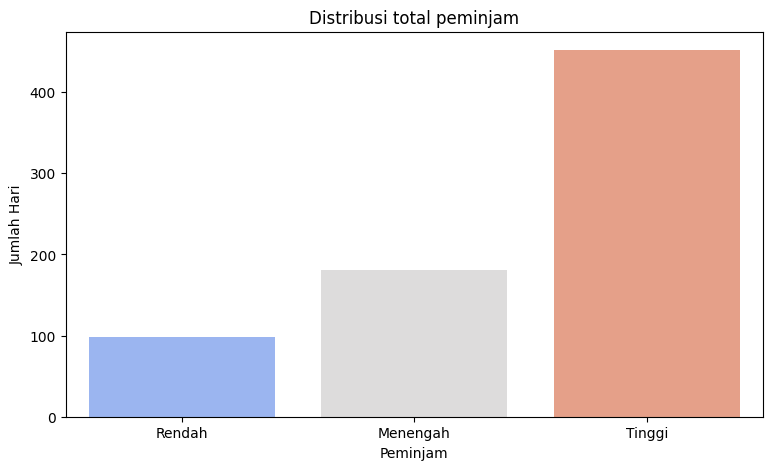

In [149]:
plt.figure(figsize=(9, 5))
sns.countplot(x=df_hari["jumlah_kategori"], palette="coolwarm")
plt.title("Distribusi total peminjam")
plt.xlabel("Peminjam")
plt.ylabel("Jumlah Hari")

<ipython-input-150-5386d90929e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_hari["suhu_kategori"], palette="coolwarm")


Text(0, 0.5, 'Jumlah Hari')

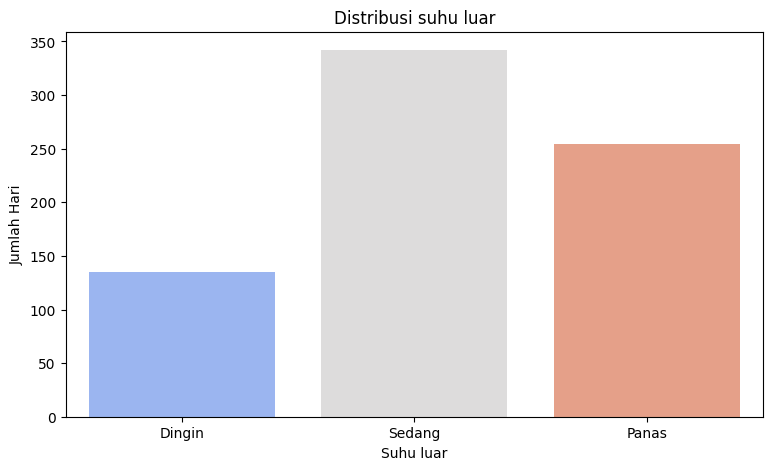

In [150]:
plt.figure(figsize=(9, 5))
sns.countplot(x=df_hari["suhu_kategori"], palette="coolwarm")
plt.title("Distribusi suhu luar")
plt.xlabel("Suhu luar")
plt.ylabel("Jumlah Hari")

**Insight:**
- Berdasarkan Binning yang di lakukan,disini menggunakan 2 parameter yaitu temp dan total peminjam, untuk itu didaptkan kelompok terbanyak dari total peminjam yaitu tinggi,dan juga peminjam cenderung menggunakan sepeda pada saat suhu yang tidak panas dan dingi(sedang).

## Conclusion

In [152]:

df_hari.to_csv("df_hari.csv", index=False)

In [153]:
df_jam.to_csv("df_jam.csv", index=False)

- Conclution pertanyaan 1: Berapa banyak peminjam yang teregistrasi dan casual?:
  + Pengguna sepeda perhari dan perjam terbanyak adalah mereka yang registered.
- Conclution pertanyaan 2: Bagaimana pola pengguaan sepeda dalam penggunaan perjam dan perhari?:
  + Pola pengguna sepeda pada perjam dan perhari mendapat lonjakan pada hari minggu dan sabtu(akhir pekan).
- Conclution pertanyaan 3: Seperti apa pengaruh cuaca dan musim dalam peminjaman sepeda perhari?
  + Cuaca juga mempengaruhi pengguna sepeda untuk melakukan kegiatan,pada saat cuaca cerah,sedikit berawan, dan berawan sebagian mempunyai presentase tertinggi dengan nilai 45.5%
- Conclution pertanyaan 4:  Seperti apa pengaruh musim dan hubungannya dengan cuaca dalam peminjaman sepeda perhari?
  + Musim juga mempengaruhi sesorang untuk menggunakan sepeda,kondisi pengguna sepeda terbanyak terjadi ketika musim gugur, dan musim panas.
  + Kemudian dari pengaruh hubungan musim dan cuaca didapatkan bahwa pengguna sepeda terbnayak di musim gugur dengan kondisi cuaca cerah,sedikit berawan di ikuti denga musim panas dan juga cuaca cerah,sedikit berawan,dan kondisi pengguna sepeda yang paling sedikit terjadi ketika musim panas,dengan cuaca salju ringan,hujan ringan.

- Manual Grupping(Berdasarkan Cuaca):
  + Melakukan  clustering atau pengelompokan berdasarkan analisis sebelumnya dengan cara membuat nama kategori,yang bermaksud untuk menandakan/mengelompokkan pengguna sepeda terbanyak berdasarkan musim.

- Bining :
  + Menggunakan 2 parameter yaitu temp dan total peminjam, untuk itu didaptkan kelompok terbanyak dari total peminjam yaitu tinggi,dan juga peminjam cenderung menggunakan sepeda pada saat suhu yang tidak panas dan dingi(sedang).